In [40]:
import numpy as np
import pylab as pl

import os
import json
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm

np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print "Problem in the way you called myregression"
        return -1
            
    reg = rm.fit()
    print "linear regression slope {}".format(reg.summary())
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.868e+31
Date:                Wed, 07 Oct 2015   Prob (F-statistic):               0.00
Time:                        14:07:42   Log-Likelihood:                 2925.2
No. Observations:                 100   AIC:                            -5848.
Df Residuals:                      99   BIC:                            -5846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7000   7.89

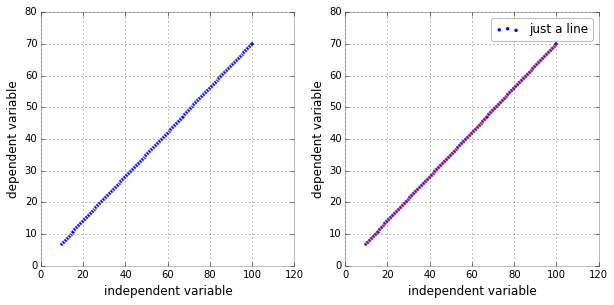

In [48]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)

mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "just a line")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5)
ax2.legend()


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.567e+04
Date:                Wed, 07 Oct 2015   Prob (F-statistic):          7.80e-111
Time:                        14:07:45   Log-Likelihood:                -274.38
No. Observations:                 100   AIC:                             550.8
Df Residuals:                      99   BIC:                             553.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7767      0

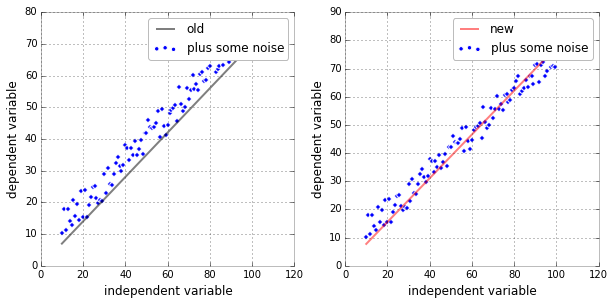

In [49]:
y = y+np.random.rand(100)*10.5
mrold = mrnew
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label='new')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            WLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2173.
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           3.55e-69
Time:                        15:30:35   Log-Likelihood:                -402.13
No. Observations:                 100   AIC:                             806.3
Df Residuals:                      99   BIC:                             808.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0376      0

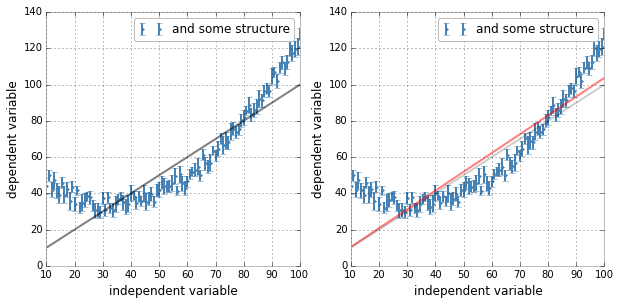

In [69]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y+3e-3*((x-50)**2)
mrold = mrnew
mrnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
e = np.random.rand(100)*2.5+2.5
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5)

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.2)

ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5)
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()


[  2.04638160e-02  -2.38399802e+00   5.67896951e+01]
2.92346375628
134.950840946


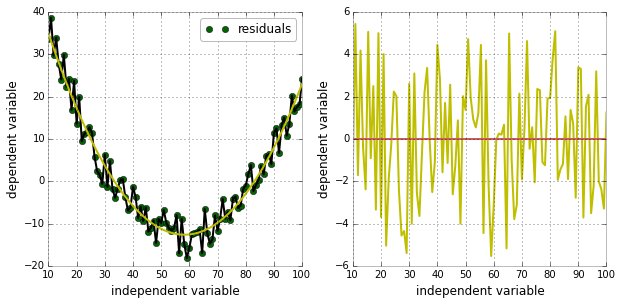

In [89]:
mrres = np.polyfit(x, y-mrnew.predict(x), 2)
print mrres
fig = pl.figure(figsize=(10,10))
ax=fig.add_subplot(221)
ax.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
ax.plot(x, y-mrnew.predict(x), 'k-')

ax.plot(x,mrres[0]*x**2+mrres[1]*x+mrres[2],'y')
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()
ax=fig.add_subplot(222)

ax.plot(x,y-mrnew.predict(x)-(mrres[0]*x**2+mrres[1]*x+mrres[2]),'y')
ax.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

print mean(y-mrnew.predict(x)-(mrres[1]+mrres[0]*(x)))
print np.sqrt(sum((y-mrnew.predict(x))**2))
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

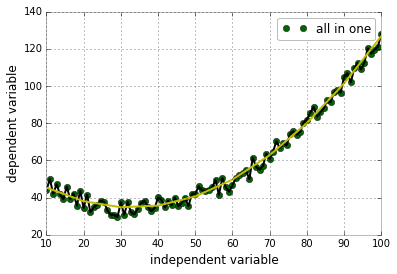

In [97]:
mrnew = np.polyfit(x, y, 2)

pl.plot(x, y, 'o', color='DarkGreen', label='all in one ')
pl.plot(x, y, 'k-')


pl.plot(xnew, np.poly1d(mrnew)(xnew), 'y', alpha=1)

pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

2.61124455392e-14
1.615934576e-06


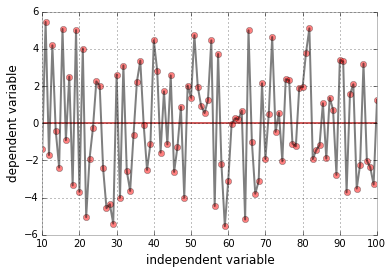

In [100]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y-np.poly1d(mrnew)(x), 'ro', alpha=0.5)
pl.plot(x, y-np.poly1d(mrnew)(x), 'k', alpha=0.5)


pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()
print mean(y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))
print np.sqrt(sum((y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))))


#many more regression diagnostics!
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html